In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
file_path = '/content/Steel_industry_data.csv'
steel_data = pd.read_csv(file_path)


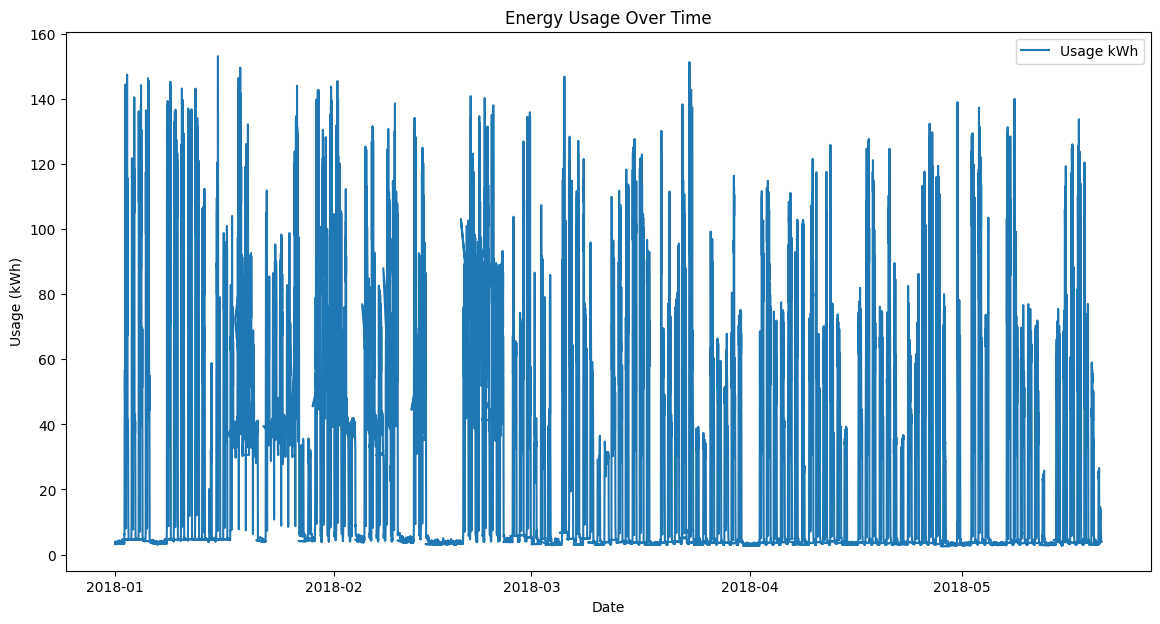

In [4]:
# Convert the 'date' column to datetime format and set it as the index
steel_data['date'] = pd.to_datetime(steel_data['date'], format='%d/%m/%Y %H:%M')
steel_data.set_index('date', inplace=True)

# Time Series Plot of Energy Usage
plt.figure(figsize=(14, 7))
plt.plot(steel_data['Usage_kWh'], label='Usage kWh')
plt.title('Energy Usage Over Time')
plt.xlabel('Date')
plt.ylabel('Usage (kWh)')
plt.legend()
plt.show()

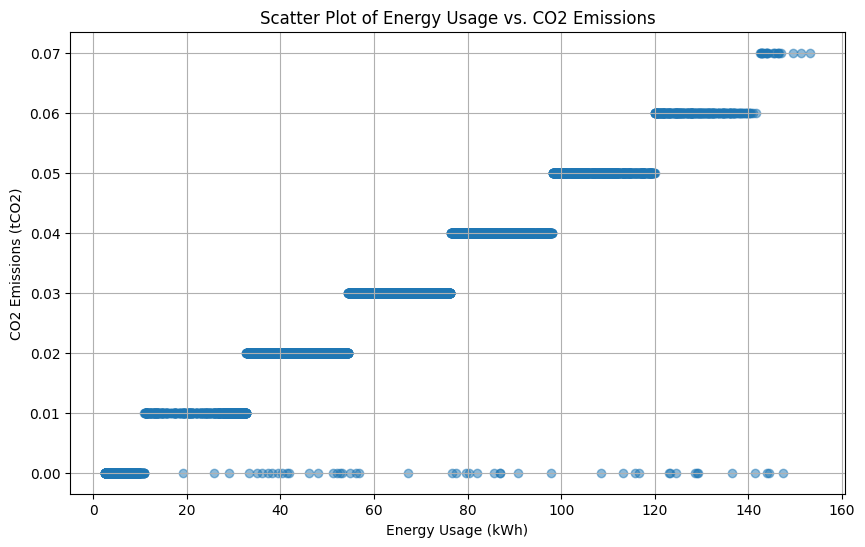

In [5]:
# Scatter Plot of Energy Usage vs. CO2 Emissions
plt.figure(figsize=(10, 6))
plt.scatter(steel_data['Usage_kWh'], steel_data['CO2(tCO2)'], alpha=0.5)
plt.title('Scatter Plot of Energy Usage vs. CO2 Emissions')
plt.xlabel('Energy Usage (kWh)')
plt.ylabel('CO2 Emissions (tCO2)')
plt.grid(True)
plt.show()


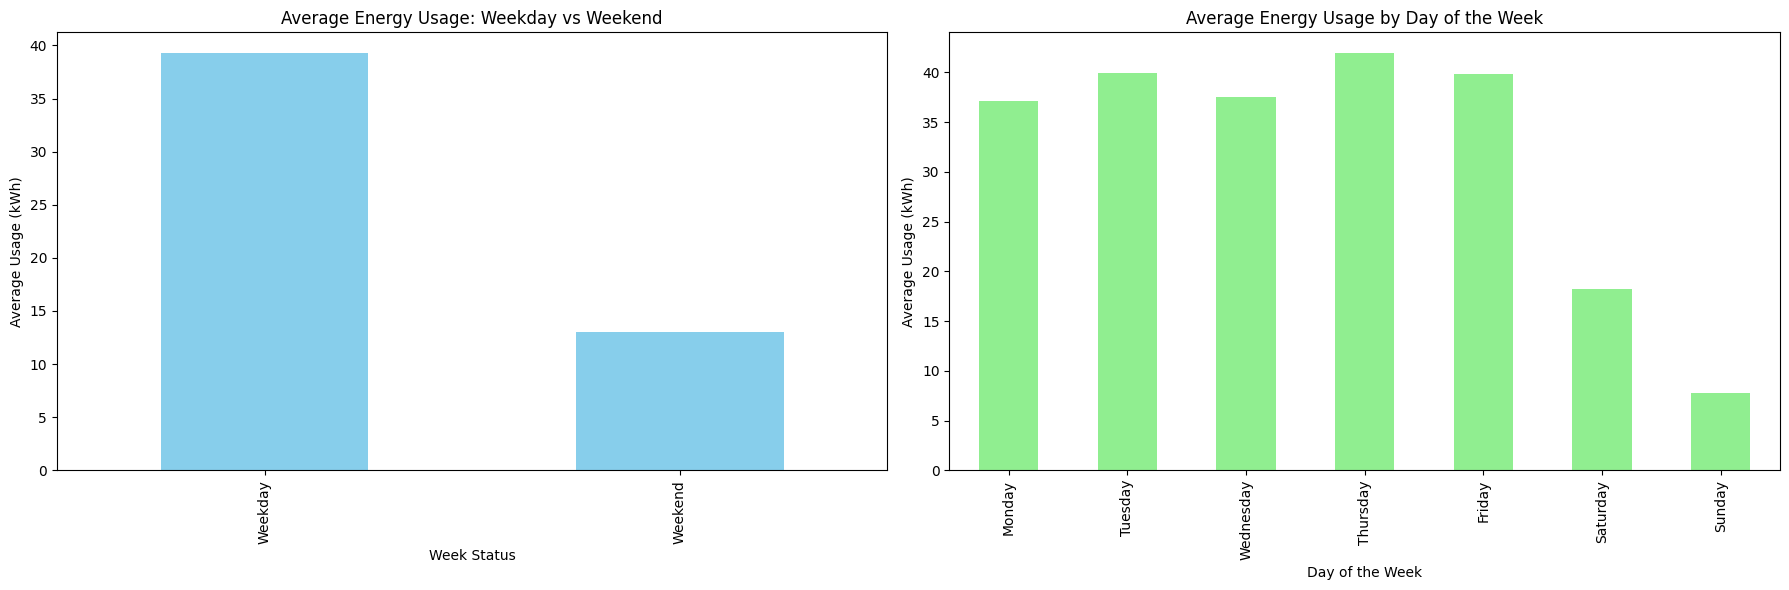

In [6]:
# Average Energy Usage by Week Status and Day of the Week
weekly_status_mean = steel_data.groupby('WeekStatus')['Usage_kWh'].mean()
day_of_week_mean = steel_data.groupby('Day_of_week')['Usage_kWh'].mean().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

fig, ax = plt.subplots(1, 2, figsize=(18, 6))
weekly_status_mean.plot(kind='bar', ax=ax[0], color='skyblue')
ax[0].set_title('Average Energy Usage: Weekday vs Weekend')
ax[0].set_ylabel('Average Usage (kWh)')
ax[0].set_xlabel('Week Status')

day_of_week_mean.plot(kind='bar', ax=ax[1], color='lightgreen')
ax[1].set_title('Average Energy Usage by Day of the Week')
ax[1].set_ylabel('Average Usage (kWh)')
ax[1].set_xlabel('Day of the Week')
plt.tight_layout()
plt.show()

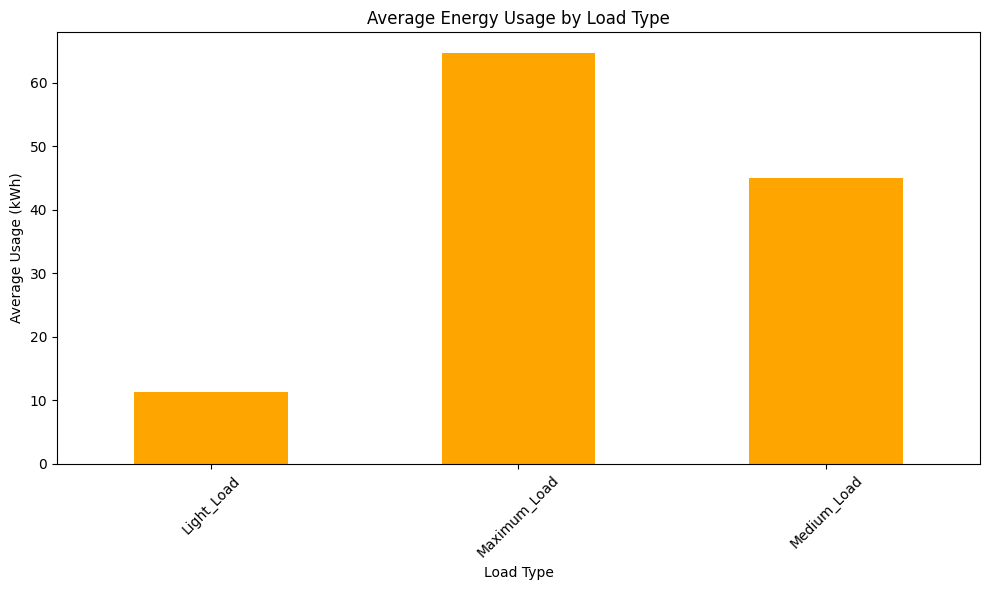

In [7]:
# Average Energy Usage by Load Type
load_type_mean = steel_data.groupby('Load_Type')['Usage_kWh'].mean()
plt.figure(figsize=(10, 6))
load_type_mean.plot(kind='bar', color='orange')
plt.title('Average Energy Usage by Load Type')
plt.ylabel('Average Usage (kWh)')
plt.xlabel('Load Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

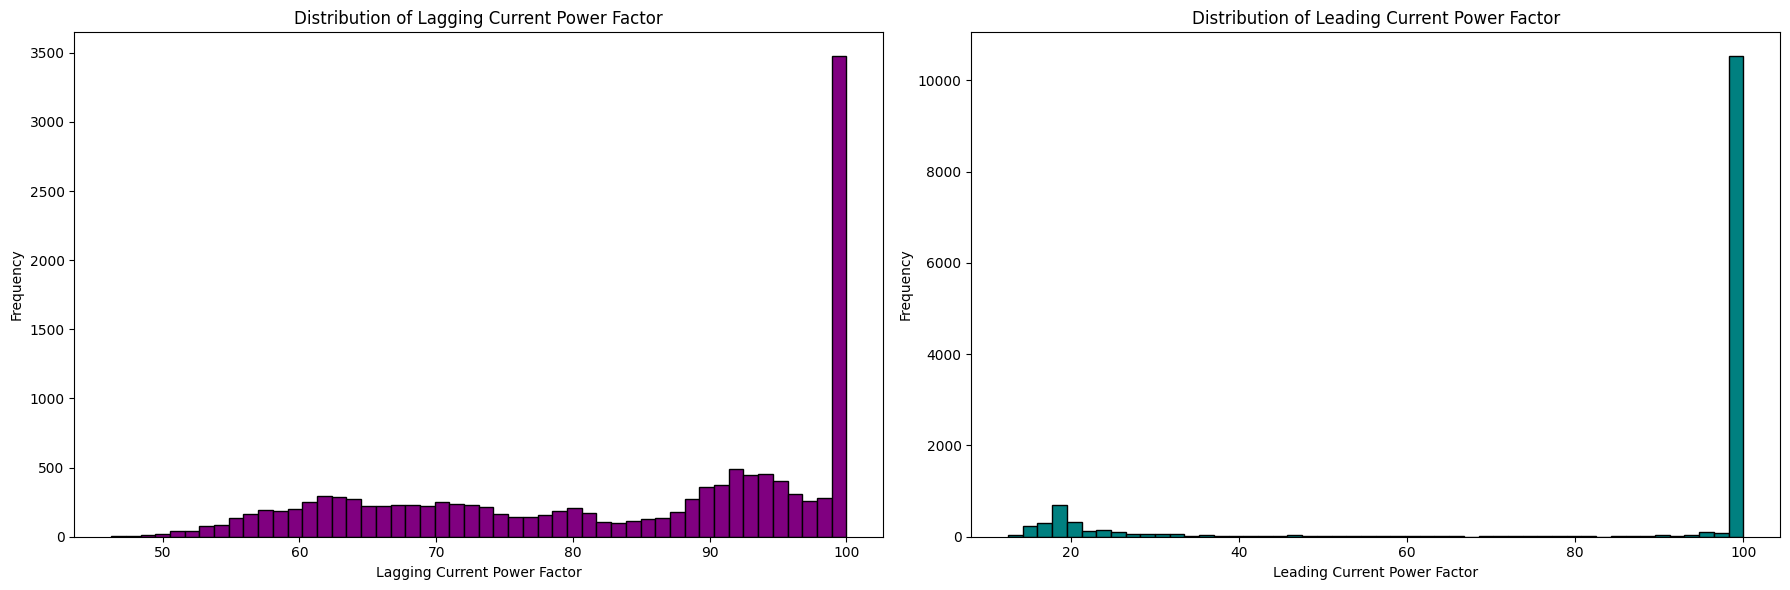

In [8]:

# Distribution of Power Factors
fig, ax = plt.subplots(1, 2, figsize=(18, 6))
steel_data['Lagging_Current_Power_Factor'].plot(kind='hist', bins=50, ax=ax[0], color='purple', edgecolor='black')
ax[0].set_title('Distribution of Lagging Current Power Factor')
ax[0].set_xlabel('Lagging Current Power Factor')
ax[0].set_ylabel('Frequency')

steel_data['Leading_Current_Power_Factor'].plot(kind='hist', bins=50, ax=ax[1], color='teal', edgecolor='black')
ax[1].set_title('Distribution of Leading Current Power Factor')
ax[1].set_xlabel('Leading Current Power Factor')
ax[1].set_ylabel('Frequency')
plt.tight_layout()
plt.show()








